In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes, fetch_california_housing

In [3]:
data = load_diabetes()

In [4]:
#data = fetch_california_housing()

In [5]:
X = data.data
y = data.target
y_max = y.max()
# y = y/y_max
feature_names = data.feature_names
X_frame = pd.DataFrame(X, columns=feature_names)

In [6]:
X_frame["sex"]>0 

0       True
1      False
2       True
3      False
4      False
       ...  
437     True
438     True
439     True
440    False
441    False
Name: sex, Length: 442, dtype: bool

In [7]:
# Sprawdzamy czy płeć może mnieć wpływ

In [8]:
X_frame["sex_1"] = (X_frame["sex"]>0).astype("float") 
X_frame["sex_2"] = (X_frame["sex"]<0).astype("float") 


In [9]:
X_frame.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'sex_1',
       'sex_2'],
      dtype='object')

In [10]:
X = X_frame.drop("sex",axis=1)
feature_names = X.columns

In [11]:
X = X.values

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [13]:
# # Zaburzenie
# X_frame["bmi_noise"] = X_frame["bmi"]
# X = X_frame.values
# feature_names = X_frame.columns

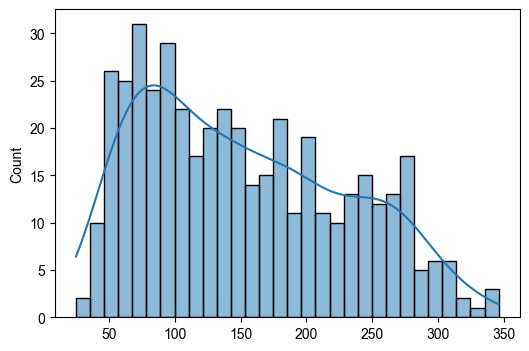

In [14]:
plt.figure(figsize = (6,4))
sns.histplot(y, bins =30, kde = True)
plt.show()

-2.511816797794472e-19 0.047619047619047644


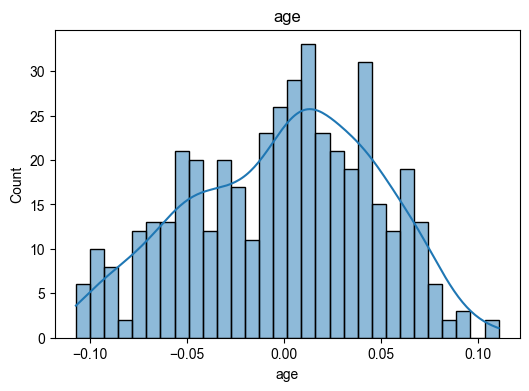

-2.2455642172282577e-16 0.047619047619047616


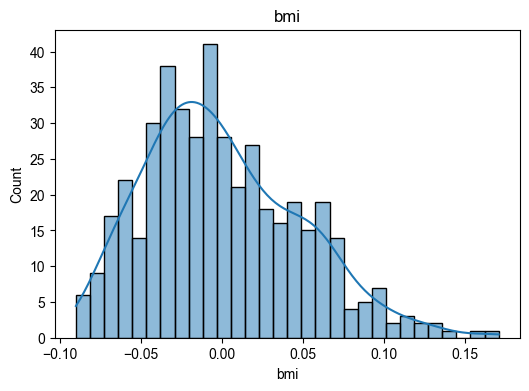

-4.7975700837874414e-17 0.047619047619047596


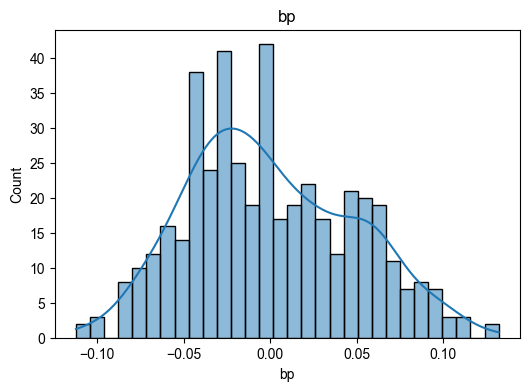

-1.3814992387869595e-17 0.04761904761904759


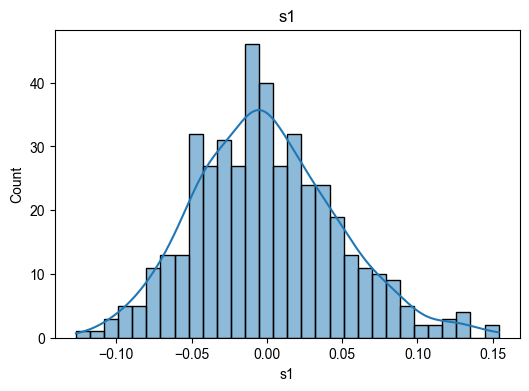

3.918434204559376e-17 0.047619047619047644


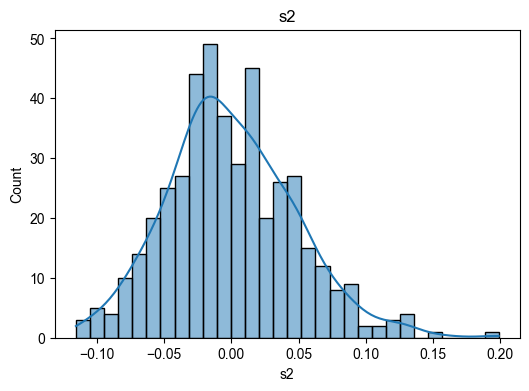

-5.7771786349272854e-18 0.047619047619047596


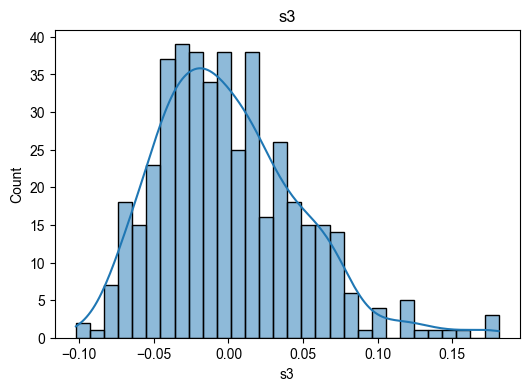

-9.042540472060099e-18 0.047619047619047616


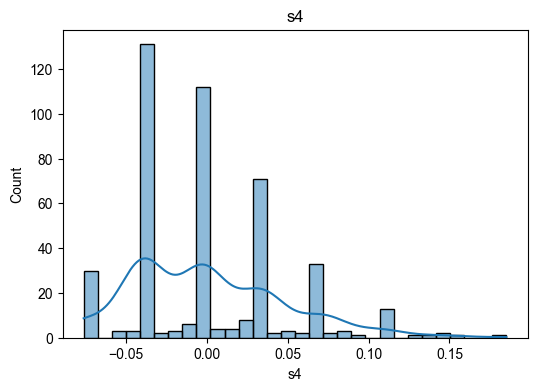

9.293722151839546e-17 0.047619047619047616


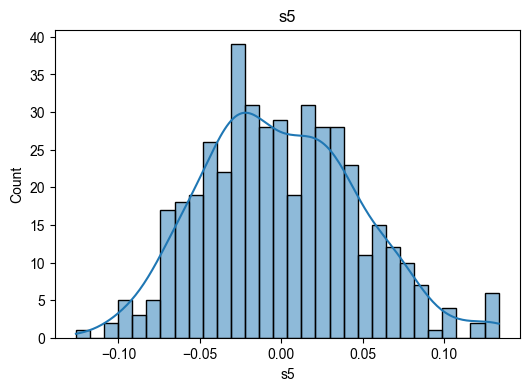

1.1303175590075123e-17 0.047619047619047644


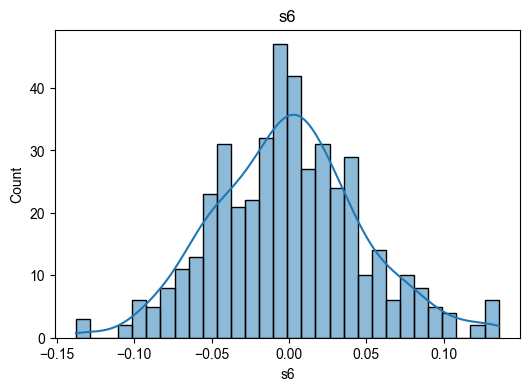

0.4683257918552036 0.4995611704353544


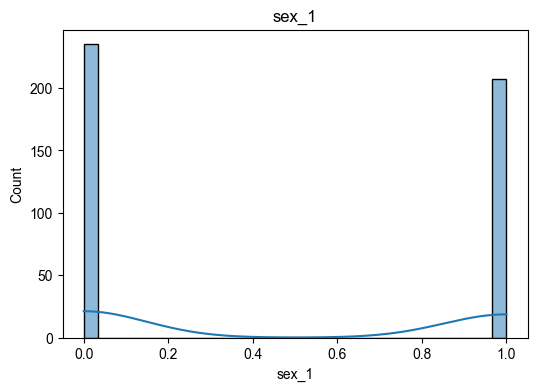

0.5316742081447964 0.4995611704353544


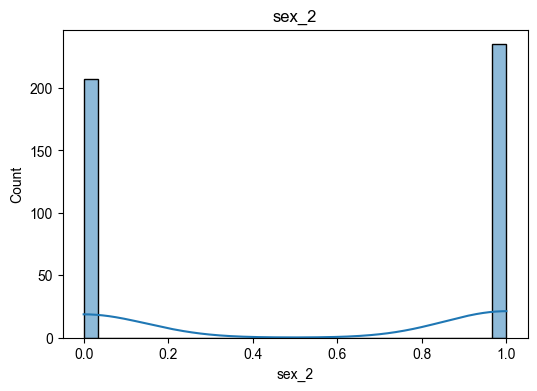

In [15]:
for feature in feature_names:
    print(X_frame[feature].mean(), X_frame[feature].std())
    plt.figure(figsize = (6,4))
    sns.histplot(X_frame[feature], bins =30, kde = True)
    plt.title(feature)
    plt.show()
    

In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y, 
                                                   test_size=0.2,
                                                   random_state=42)

In [18]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

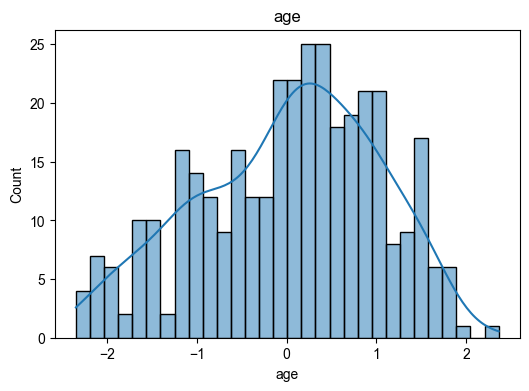

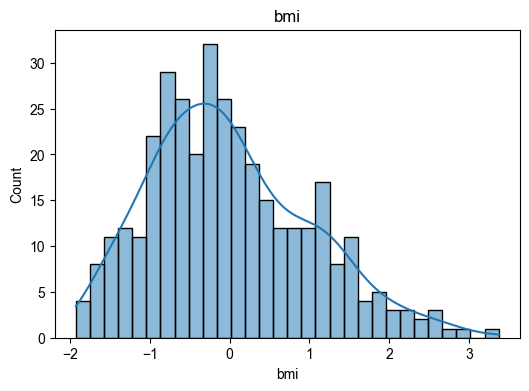

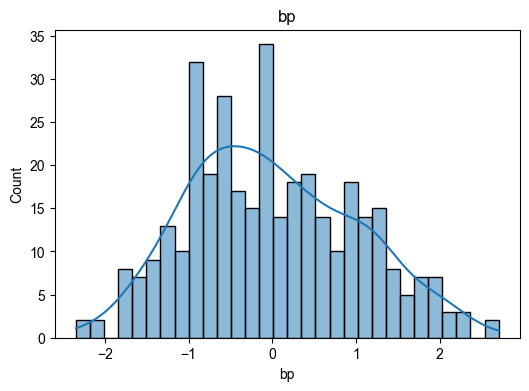

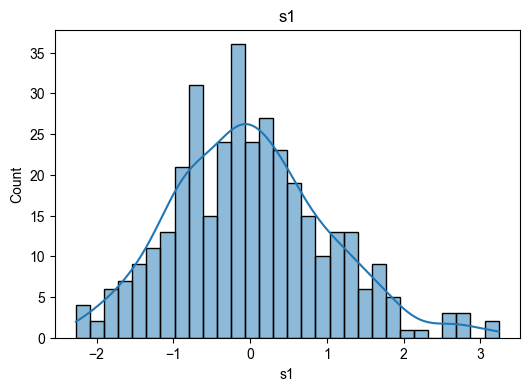

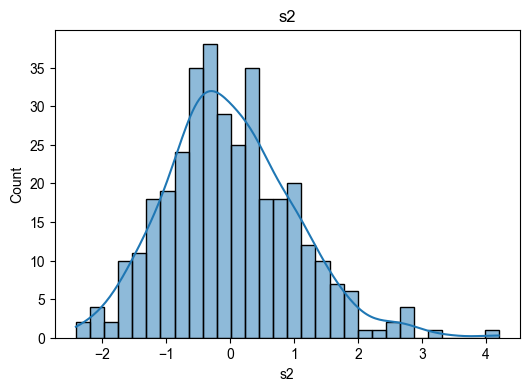

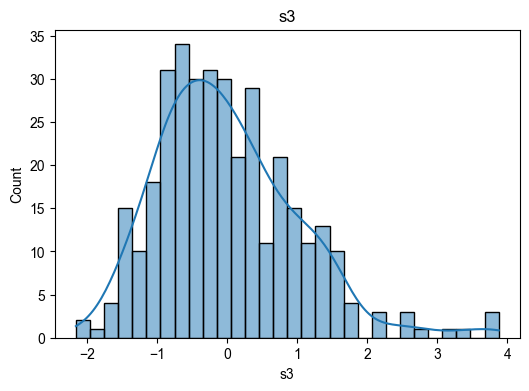

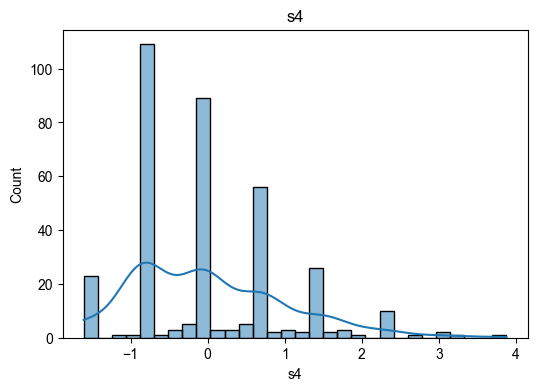

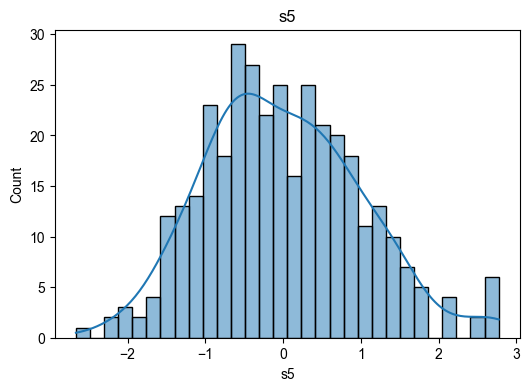

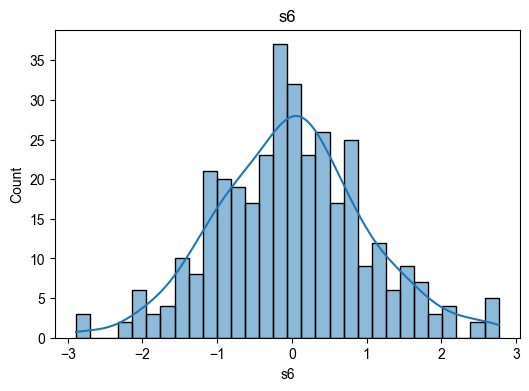

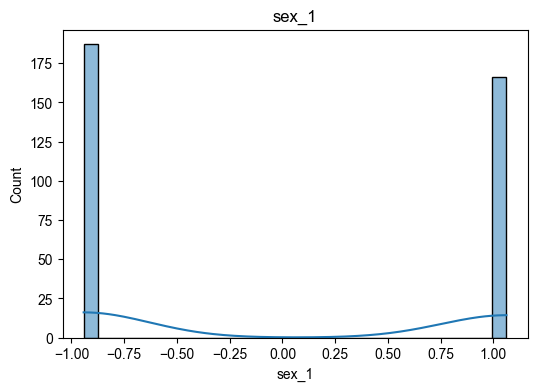

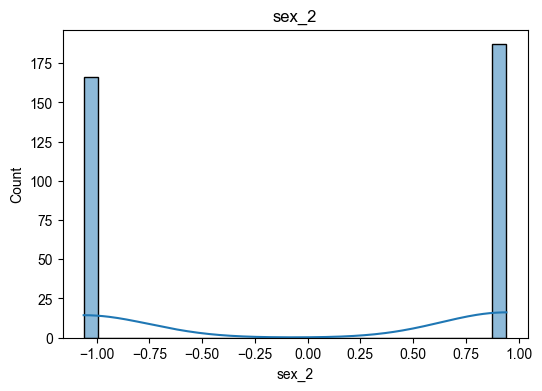

In [19]:
for feature in feature_names:
    plt.figure(figsize = (6,4))
    sns.histplot(pd.DataFrame(X_train,columns=feature_names)[feature], bins =30, kde = True)
    plt.title(feature)
    plt.show()

In [20]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
en = ElasticNet()

In [21]:
for model in [lr, ridge, lasso, en]:
    model = model.fit(X_train,y_train)

In [22]:
for model in [lr, ridge, lasso, en]:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    print(f"{model.__class__}: {mse:.2f}")
    print(f"{model.__class__}: {np.sqrt(mse):.2f}")


<class 'sklearn.linear_model._base.LinearRegression'>: 2900.19
<class 'sklearn.linear_model._base.LinearRegression'>: 53.85
<class 'sklearn.linear_model._ridge.Ridge'>: 2892.05
<class 'sklearn.linear_model._ridge.Ridge'>: 53.78
<class 'sklearn.linear_model._coordinate_descent.Lasso'>: 2824.56
<class 'sklearn.linear_model._coordinate_descent.Lasso'>: 53.15
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>: 2884.03
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>: 53.70


In [23]:
for model in [lr, ridge, lasso, en]:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test*y_max,y_pred*y_max)
    print(f"{model.__class__}: {mse:.2f}")


<class 'sklearn.linear_model._base.LinearRegression'>: 347199580.43
<class 'sklearn.linear_model._ridge.Ridge'>: 346225008.43
<class 'sklearn.linear_model._coordinate_descent.Lasso'>: 338145552.03
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>: 345264015.85


In [24]:
len(lasso.coef_)
len(feature_names)

11

In [25]:
models = [lr, ridge, lasso, en]

In [26]:
np.append(feature_names , "intercept")

array(['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'sex_1',
       'sex_2', 'intercept'], dtype=object)

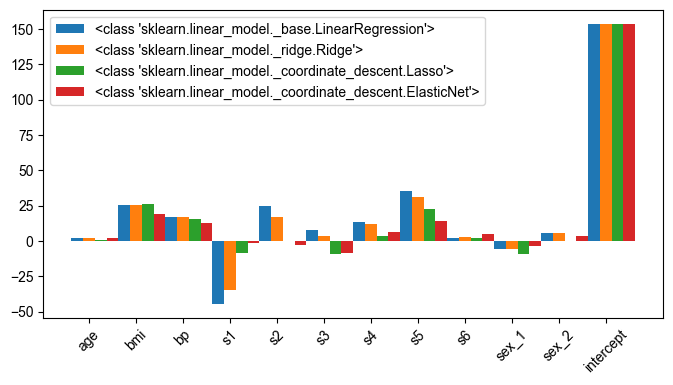

In [27]:
coefs =[np.append(model.coef_, model.intercept_) for model in models]
plt.figure(figsize=(8,4))
x = np.arange(len(feature_names)+1)
for i, model in enumerate(models):
    plt.bar(x + i*0.25, coefs[i], width=0.25, label = model.__class__)

plt.xticks(x + 0.25, np.append(feature_names , "intercept"), rotation=45)
plt.legend()
plt.show()

In [28]:
feature_names

Index(['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'sex_1',
       'sex_2'],
      dtype='object')

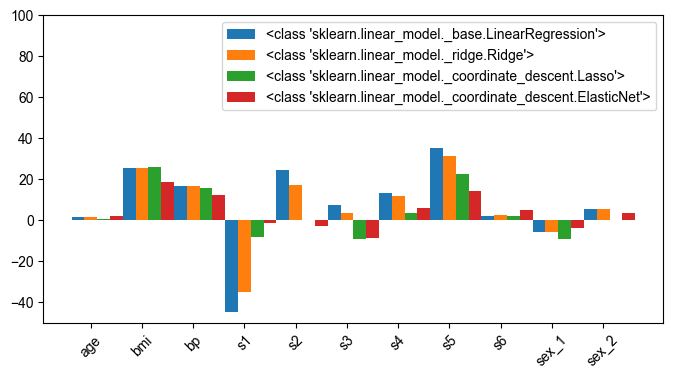

In [29]:
coefs =[model.coef_ for model in models]
plt.figure(figsize=(8,4))
x = np.arange(len(feature_names))
for i, model in enumerate(models):
    plt.bar(x+i*0.25, coefs[i], width=0.25, label = model.__class__)

plt.xticks(x+0.25, feature_names,rotation=45)
plt.legend()
plt.ylim([-50,100])
plt.show()

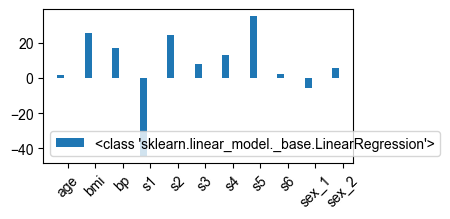

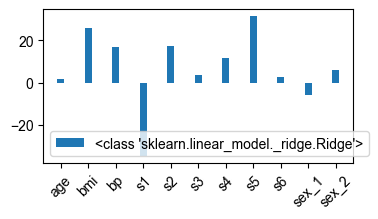

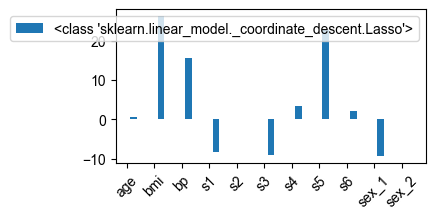

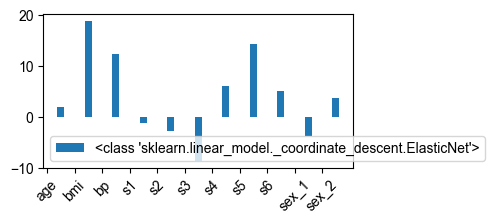

In [30]:
coefs =[model.coef_ for model in models]

x = np.arange(len(feature_names))
for i, model in enumerate(models):
    plt.figure(figsize=(4,2))
    plt.bar(x+i*0.25, coefs[i], width=0.25, label = model.__class__)

    plt.xticks(x+0.25, feature_names,rotation=45)
    plt.legend()
    plt.show()

In [31]:
coefs

[array([  1.75375799,  25.60712144,  16.82887167, -44.44885564,
         24.64095356,   7.67697768,  13.1387839 ,  35.16119521,
          2.35136365,  -5.75590454,   5.75590454]),
 array([  1.81017058,  25.72870424,  16.7380245 , -34.67549761,
         17.05345604,   3.36703503,  11.771864  ,  31.37600715,
          2.45905522,  -5.7343529 ,   5.7343529 ]),
 array([ 6.86996297e-01,  2.62191668e+01,  1.56572826e+01, -8.22718807e+00,
        -0.00000000e+00, -9.02530190e+00,  3.41954686e+00,  2.26363523e+01,
         2.09863657e+00, -9.29750099e+00,  1.61029515e-16]),
 array([ 1.94500084, 18.84090779, 12.39563693, -1.25645491, -2.85314907,
        -8.67315193,  6.04391268, 14.37130033,  5.06584797, -3.70198156,
         3.70171162])]

In [32]:
alpha = np.logspace(-6,12,19)
alpha

array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08, 1.e+09,
       1.e+10, 1.e+11, 1.e+12])

In [33]:
models = []
for a in alpha:
    ridge = Ridge(a)
    ridge.fit(X_train, y_train)
    models.append(ridge)
   

In [34]:
for model,a in zip(models,alpha):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    print(f"{a}: {mse:.2f}")

1e-06: 2900.19
1e-05: 2900.19
0.0001: 2900.19
0.001: 2900.18
0.01: 2900.08
0.1: 2899.06
1.0: 2892.05
10.0: 2876.10
100.0: 2856.54
1000.0: 3451.35
10000.0: 4870.55
100000.0: 5303.72
1000000.0: 5355.65
10000000.0: 5360.94
100000000.0: 5361.47
1000000000.0: 5361.53
10000000000.0: 5361.53
100000000000.0: 5361.53
1000000000000.0: 5361.53


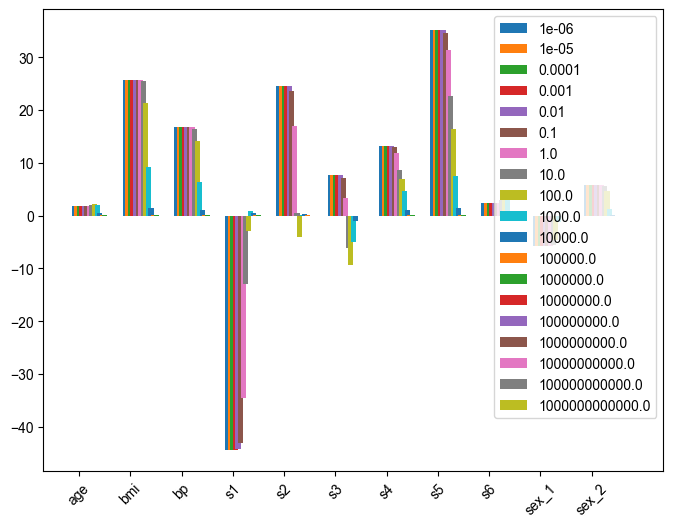

In [35]:
coefs =np.array([model.coef_ for model in models])
plt.figure(figsize=(8,6))
x = np.arange(len(feature_names))
for i, model in enumerate(models):
    plt.bar(x+i*0.05, coefs[i], width=0.1, label = alpha[i])

plt.xticks(x+0.1, feature_names,rotation=45)
plt.legend()
plt.show()

<Figure size 800x200 with 0 Axes>

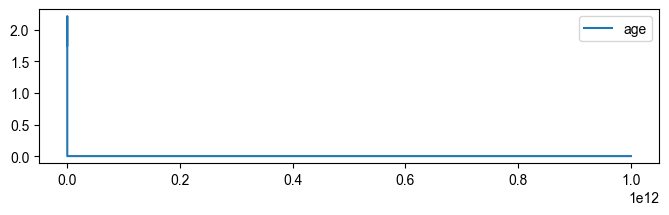

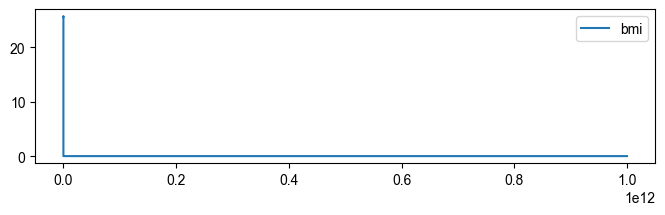

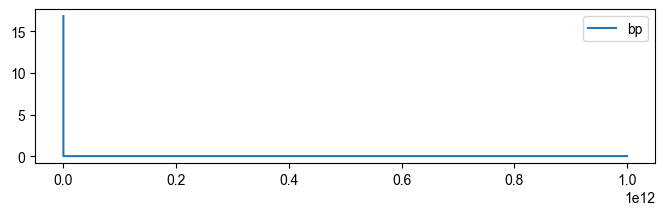

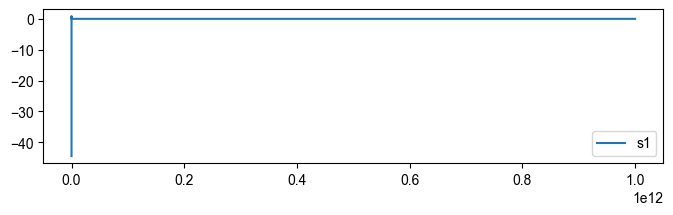

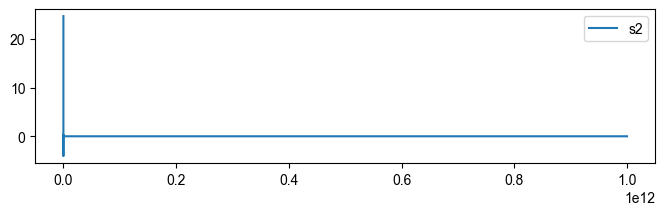

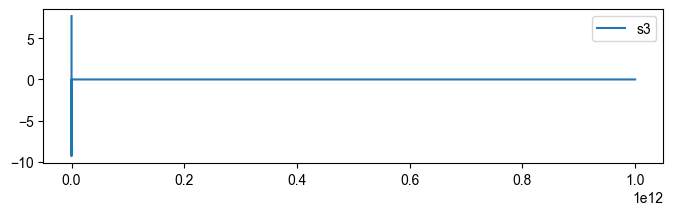

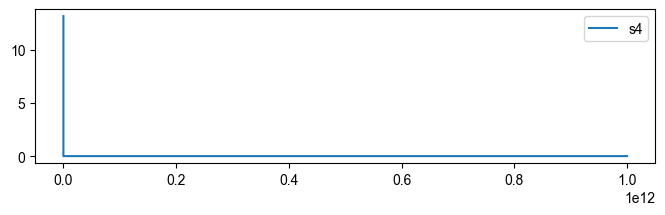

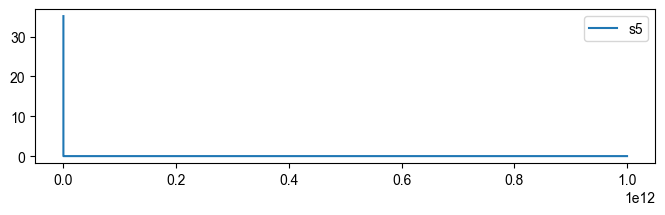

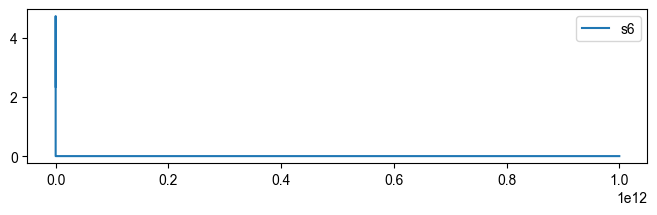

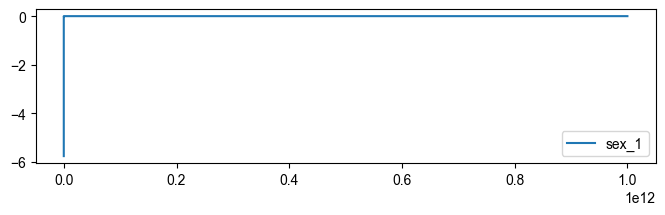

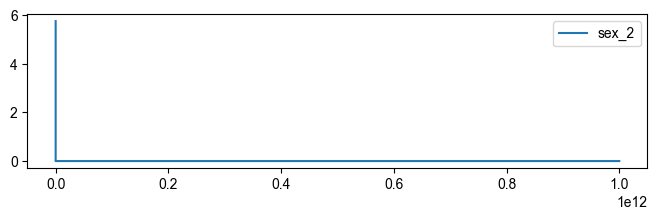

In [36]:
plt.figure(figsize=(8,2))
x = np.arange(len(feature_names))
for i, feature in enumerate(feature_names):
    plt.figure(figsize=(8,2))
    plt.plot(alpha, coefs[:,i], label = feature)
    #plt.xticks(x+0.1, feature_names,rotation=45)
    plt.legend()
    plt.show()

In [46]:
models = []
mse_ = []
for a in alpha:
    for b in alpha:
        alp = a + b 
        l1_ratio = a / (a + b)
        en = ElasticNet(alpha =alp, l1_ratio=l1_ratio)
        en.fit(X_train, y_train)
        models.append(en)
        y_pred = en.predict(X_test)
        mse = mean_squared_error(y_test,y_pred)
        mse_.append(mse)

C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.144e+05, tolerance: 2.145e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.973e+05, tolerance: 2.145e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\dell\Documents\AK\MFoDL\.idea\VirtualEnvironment\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

In [47]:
mse_

[2900.1892688539147,
 2900.1517526256107,
 2899.782219861269,
 2896.585076828037,
 2884.019382654365,
 2860.3008290482053,
 3005.8060399984947,
 4301.940580894709,
 5203.436376925502,
 5344.923312908927,
 5359.864014829947,
 5361.366428272619,
 5361.516753494222,
 5361.531786855605,
 5361.533290200137,
 5361.533440534674,
 5361.5334555681275,
 5361.533457071474,
 5361.533457221808,
 2900.1875983936225,
 2900.1500958633032,
 2899.7805877194205,
 2896.5836557483767,
 2884.018874424827,
 2860.30036590613,
 3005.80615144976,
 4301.940793603174,
 5203.43642383371,
 5344.923317961682,
 5359.864015339067,
 5361.3664283235685,
 5361.516753499318,
 5361.531786856115,
 5361.533290200187,
 5361.533440534679,
 5361.533455568129,
 5361.533457071474,
 5361.533457221808,
 2900.170904066221,
 2900.133415632075,
 2899.7642688597844,
 2896.5694470993017,
 2884.0136962734764,
 2860.2957317601454,
 3005.80724931155,
 4301.942935263596,
 5203.43689312424,
 5344.923368489233,
 5359.864020430258,
 5361.36642

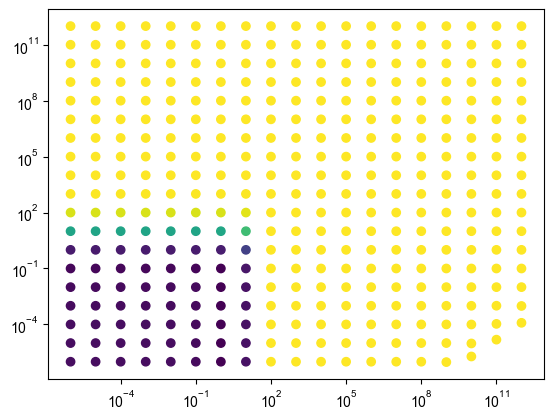

In [62]:
a = []
b =[]
for model, mse in zip(models, mse_):
    a.append(model.l1_ratio * model.alpha)
    b.append(model.alpha - (model.l1_ratio * model.alpha))
    
    
plt.scatter(a, b, c=mse_, cmap="viridis")
plt.xscale("log")
plt.yscale("log")

In [60]:
a

[np.float64(1e-06),
 np.float64(1e-06),
 np.float64(1e-06),
 np.float64(1e-06),
 np.float64(1e-06),
 np.float64(1e-06),
 np.float64(1e-06),
 np.float64(1e-06),
 np.float64(1e-06),
 np.float64(1e-06),
 np.float64(1e-06),
 np.float64(1e-06),
 np.float64(1e-06),
 np.float64(1e-06),
 np.float64(1e-06),
 np.float64(1e-06),
 np.float64(1e-06),
 np.float64(1e-06),
 np.float64(1e-06),
 np.float64(1e-05),
 np.float64(1e-05),
 np.float64(1e-05),
 np.float64(1e-05),
 np.float64(9.999999999999999e-06),
 np.float64(1e-05),
 np.float64(1e-05),
 np.float64(1e-05),
 np.float64(1e-05),
 np.float64(1e-05),
 np.float64(1e-05),
 np.float64(1e-05),
 np.float64(1e-05),
 np.float64(9.999999999999999e-06),
 np.float64(1e-05),
 np.float64(1e-05),
 np.float64(1e-05),
 np.float64(1e-05),
 np.float64(1e-05),
 np.float64(0.0001),
 np.float64(0.0001),
 np.float64(0.0001),
 np.float64(0.0001),
 np.float64(9.999999999999999e-05),
 np.float64(0.0001),
 np.float64(0.0001),
 np.float64(0.0001),
 np.float64(0.0001),
 np.

In [58]:
b

[array([1.e-06]),
 array([1.e-05, 1.e-05]),
 array([0.0001, 0.0001, 0.0001]),
 array([0.001, 0.001, 0.001, 0.001]),
 array([0.01, 0.01, 0.01, 0.01, 0.01]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
 array([1., 1., 1., 1., 1., 1., 1.]),
 array([10., 10., 10., 10., 10., 10., 10., 10.]),
 array([100., 100., 100., 100., 100., 100., 100., 100., 100.]),
 array([1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
        1000.]),
 array([10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
        10000., 10000., 10000.]),
 array([100000., 100000., 100000., 100000., 100000., 100000., 100000.,
        100000., 100000., 100000., 100000., 100000.]),
 array([1000000., 1000000., 1000000., 1000000., 1000000., 1000000.,
        1000000., 1000000., 1000000., 1000000., 1000000., 1000000.,
        1000000.]),
 array([10000000., 10000000., 10000000., 10000000., 10000000., 10000000.,
        10000000., 10000000., 10000000., 10000000., 10000000., 10000000.,
        10000000., 10000000.